In [1]:
from pycocotools.coco import COCO
from pycocoevalcap.eval import COCOEvalCap
import matplotlib.pyplot as plt
import skimage.io as io
import pylab

pylab.rcParams["figure.figsize"] = (10.0, 8.0)

import json
from json import encoder
import numpy as np
encoder.FLOAT_REPR = lambda o: format(o, ".3f")

In [2]:
# # set up file names and pathes
# dataDir = "/root/Image2CaptionAttack/eval_scores/coco-caption-eval"
# dataType = "val2014"
# algName = "fakecap"
# annFile = "%s/annotations/captions_%s.json" % (dataDir, dataType)
# subtypes = ["results", "evalImgs", "eval"]
# [resFile, evalImgsFile, evalFile] = [
#     "%s/results/captions_%s_%s_%s.json" % (dataDir, dataType, algName, subtype)
#     for subtype in subtypes
# ]

In [25]:
blip2_model = "blip2-opt-2.7b"
clip_model = "RN50"
leaked_feature_layer = "resnet-layer1"

In [29]:
annFile = "/root/autodl-tmp/datasets/image_caption_generation/COCO2017/annotations/captions_val2017.json"
# annFile = "H:/Code/AutoDL_backup/datasets/image_caption_generation/COCO2017/annotations/captions_val2017.json"
resFile = f"/root/Image2CaptionAttack/processed_results/results_COCO2017_{blip2_model}_{clip_model}_{leaked_feature_layer}.json"

In [30]:
# create coco object and cocoRes object
coco = COCO(annFile)
cocoRes = coco.loadRes(resFile)

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!


In [31]:
# create cocoEval object by taking coco and cocoRes
cocoEval = COCOEvalCap(coco, cocoRes)

# evaluate on a subset of images by setting
# cocoEval.params['image_id'] = cocoRes.getImgIds()
# please remove this line when evaluating the full validation set
cocoEval.params["image_id"] = cocoRes.getImgIds()

# evaluate results
# SPICE will take a few minutes the first time, but speeds up due to caching
cocoEval.evaluate()

tokenization...


PTBTokenizer tokenized 307315 tokens at 1134107.53 tokens per second.
PTBTokenizer tokenized 62074 tokens at 544995.40 tokens per second.


setting up scorers...
computing Bleu score...
{'testlen': 52053, 'reflen': 50113, 'guess': [52053, 47053, 42053, 37053], 'correct': [25717, 8242, 2535, 923]}
ratio: 1.0387125097279941
Bleu_1: 0.494
Bleu_2: 0.294
Bleu_3: 0.173
Bleu_4: 0.107
computing METEOR score...
METEOR: 0.146
computing Rouge score...
ROUGE_L: 0.373
computing CIDEr score...
CIDEr: 0.238
computing SPICE score...


Parsing reference captions
Parsing test captions


SPICE evaluation took: 4.478 s
SPICE: 0.066


In [24]:
# print output evaluation scores
for metric, score in cocoEval.eval.items():
    print('%s: %.3f'%(metric, score))

Bleu_1: 0.048
Bleu_2: 0.023
Bleu_3: 0.011
Bleu_4: 0.006
METEOR: 0.037
ROUGE_L: 0.071
CIDEr: 0.027
SPICE: 0.022


In [25]:
# demo how to use evalImgs to retrieve low score result
evals = [eva for eva in cocoEval.evalImgs if eva['CIDEr']<30]
print( 'ground truth captions')
imgId = evals[0]['image_id']
annIds = coco.getAnnIds(imgIds=imgId)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

print( '\n')
print( 'generated caption (CIDEr score %0.1f)'%(evals[0]['CIDEr']))
annIds = cocoRes.getAnnIds(imgIds=imgId)
anns = cocoRes.loadAnns(annIds)
coco.showAnns(anns)

# img = coco.loadImgs(imgId)[0]
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# plt.imshow(I)
# plt.axis('off')
# plt.show()

ground truth captions
A man is in a kitchen making pizzas.
Man in apron standing on front of oven with pans and bakeware
A baker is working in the kitchen rolling dough.
A person standing by a stove in a kitchen.
A table with pies being made and a person standing near a wall with pots and pans hanging on the wall.


generated caption (CIDEr score 0.0)
A group of people sitting at a table in a restaurant.


In [ ]:
def plot_specific_metric(coco, metric):
    metric_scores = [eva[metric] for eva in coco.evalImgs]
    plt.hist(metric_scores, edgecolor = "white", density = True)

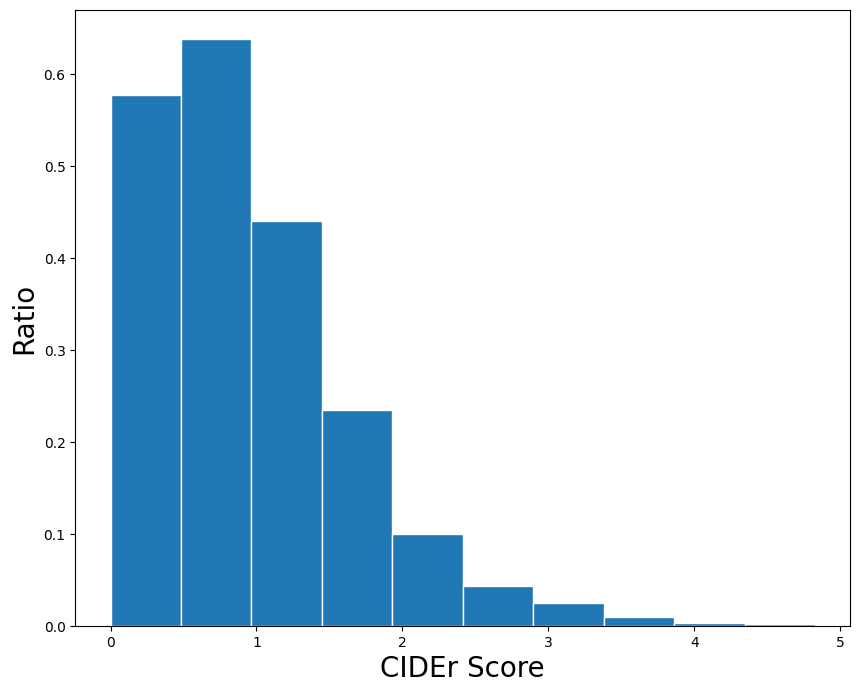

In [22]:
# plot score histogram
ciderScores = [eva["CIDEr"] for eva in cocoEval.evalImgs]
plt.hist(ciderScores, edgecolor = "white", density = True)
# plt.title("Histogram of CIDEr Scores", fontsize=20)
plt.xlabel("CIDEr Score", fontsize=20)
plt.ylabel("Ratio", fontsize=20)
plt.show()


In [18]:
# # save evaluation results to ./results folder
# json.dump(cocoEval.evalImgs, open(evalImgsFile, "w"))
# json.dump(cocoEval.eval, open(evalFile, "w"))

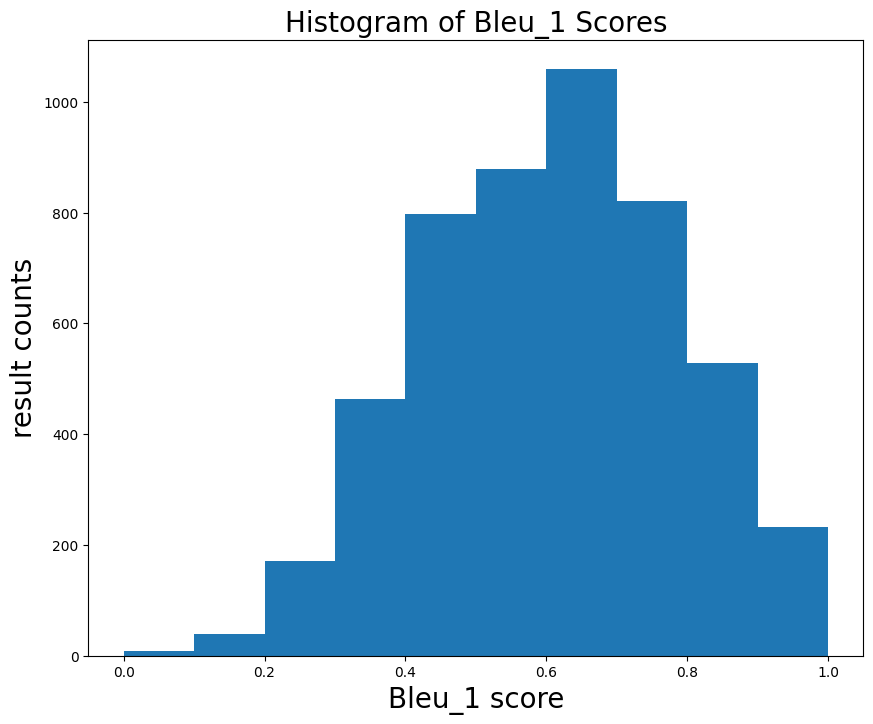

In [51]:
# plot Bleu_1 score histogram
bleu1Scores = [eva["Bleu_1"] for eva in cocoEval.evalImgs]
plt.hist(bleu1Scores)
plt.title("Histogram of Bleu_1 Scores", fontsize=20)
plt.xlabel("Bleu_1 score", fontsize=20)
plt.ylabel("result counts", fontsize=20)
plt.show()

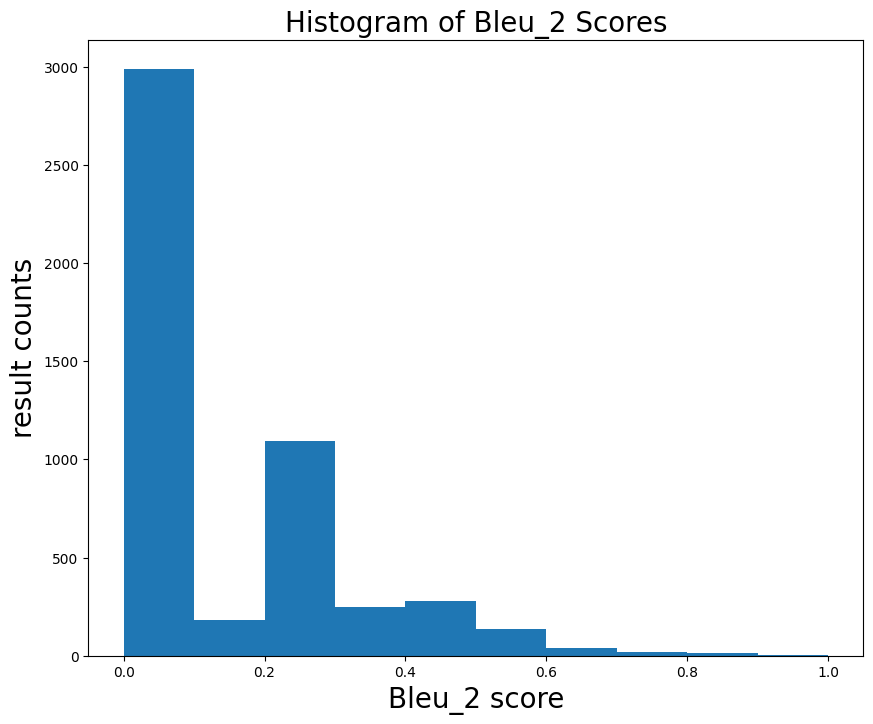

In [23]:
# plot Bleu_2 score histogram
bleu2Scores = [eva["Bleu_2"] for eva in cocoEval.evalImgs]
plt.hist(bleu2Scores)
plt.title("Histogram of Bleu_2 Scores", fontsize=20)
plt.xlabel("Bleu_2 score", fontsize=20)
plt.ylabel("result counts", fontsize=20)
plt.show()

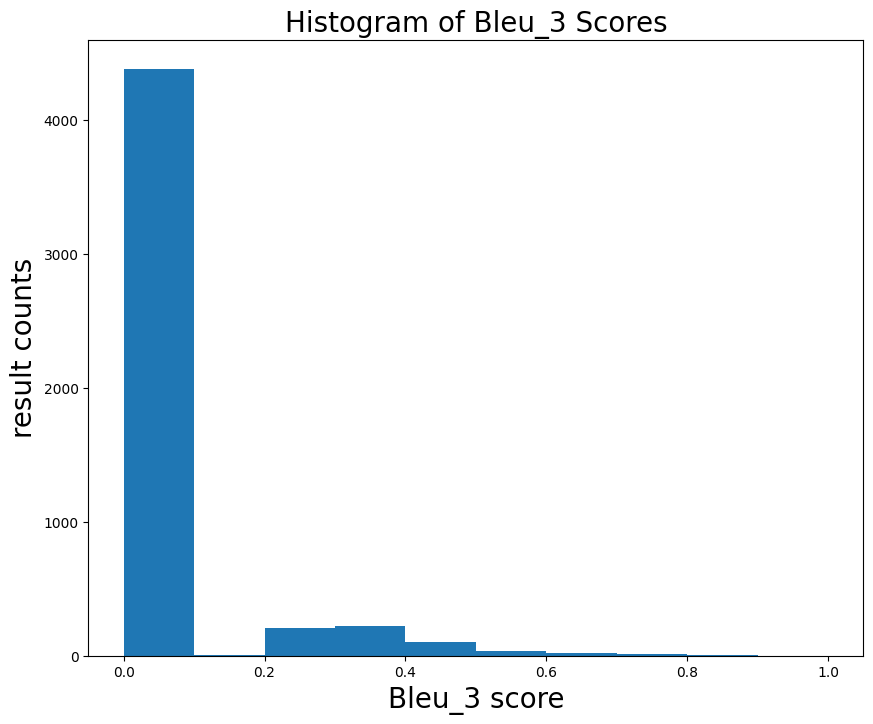

In [24]:
# plot Bleu_3 score histogram
bleu3Scores = [eva["Bleu_3"] for eva in cocoEval.evalImgs]
plt.hist(bleu3Scores)
plt.title("Histogram of Bleu_3 Scores", fontsize=20)
plt.xlabel("Bleu_3 score", fontsize=20)
plt.ylabel("result counts", fontsize=20)
plt.show()


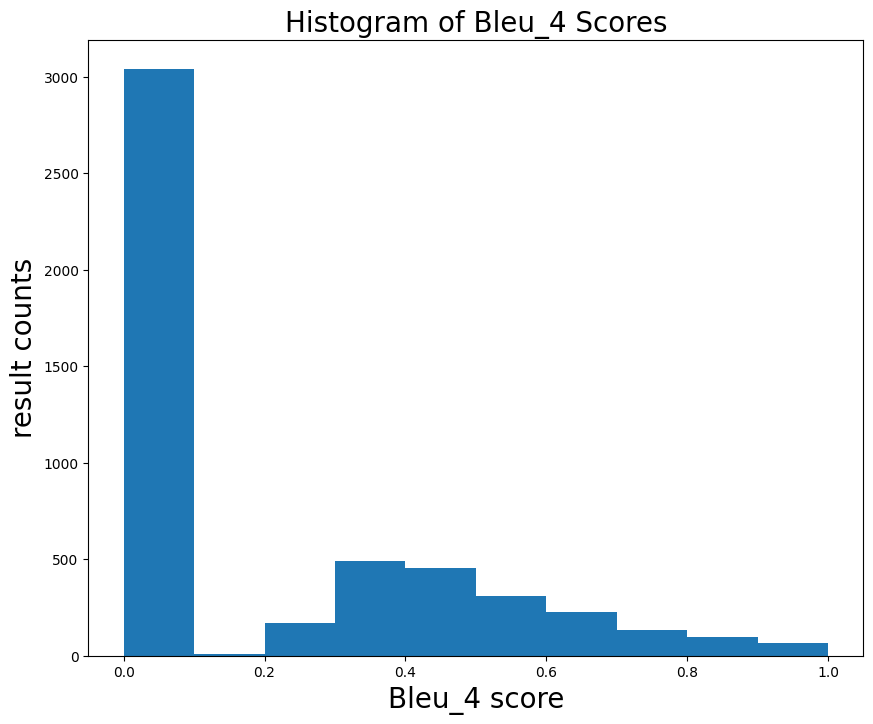

In [22]:
# plot Bleu_4 score histogram
bleu4Scores = [eva["Bleu_4"] for eva in cocoEval.evalImgs]
plt.hist(bleu4Scores)
plt.title("Histogram of Bleu_4 Scores", fontsize=20)
plt.xlabel("Bleu_4 score", fontsize=20)
plt.ylabel("result counts", fontsize=20)
plt.show()


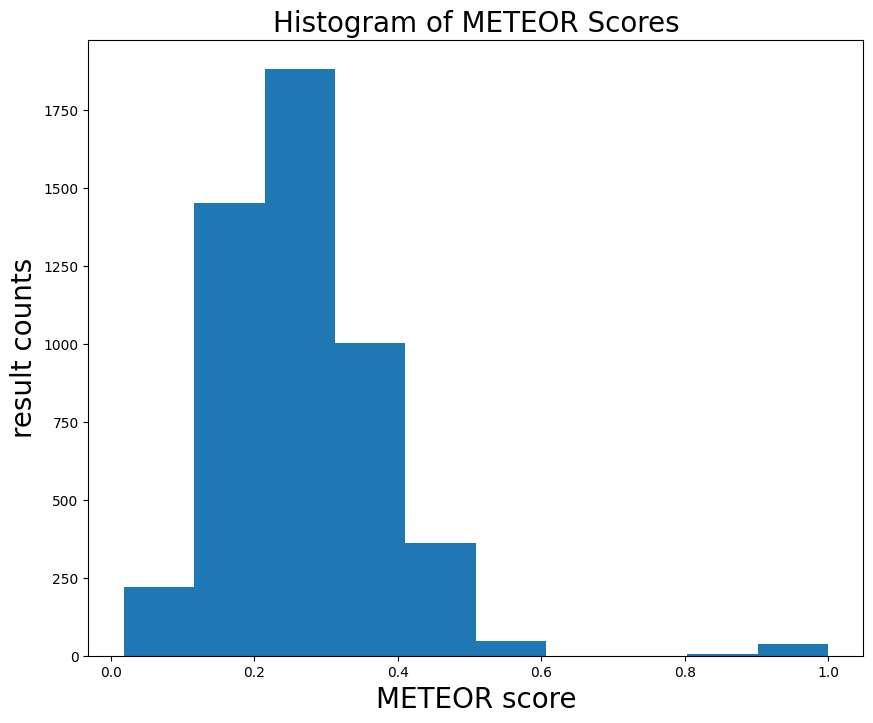

In [23]:
# plot METEOR score histogram
meteorScores = [eva["METEOR"] for eva in cocoEval.evalImgs]
plt.hist(meteorScores)
plt.title("Histogram of METEOR Scores", fontsize=20)
plt.xlabel("METEOR score", fontsize=20)
plt.ylabel("result counts", fontsize=20)
plt.show()

0.5820610687022901


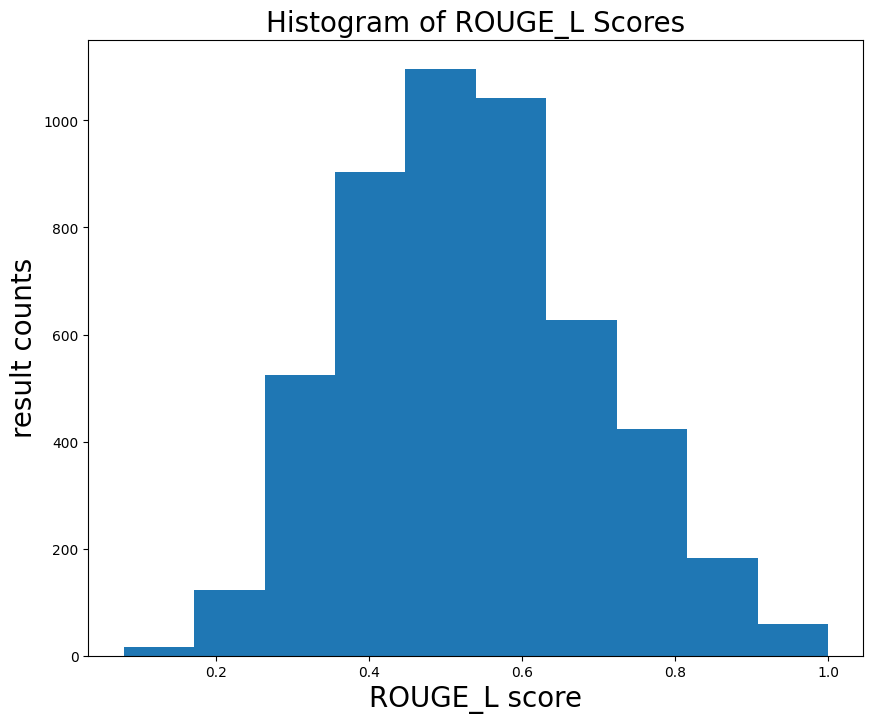

In [ ]:
# plot ROUGE_L score histogram
rougeLScores = [eva["ROUGE_L"] for eva in cocoEval.evalImgs]
print(rougeLScores)
plt.hist(rougeLScores)
plt.title("Histogram of ROUGE_L Scores", fontsize=20)
plt.xlabel("ROUGE_L score", fontsize=20)
plt.ylabel("result counts", fontsize=20)
plt.show()

In [31]:
# # plot SPICE score histogram
# spiceScores = [eva["SPICE"] for eva in cocoEval.evalImgs]
# print(spiceScores[0]["All"])
# plt.hist(spiceScores)
# plt.title("Histogram of SPICE Scores", fontsize=20)
# plt.xlabel("SPICE score", fontsize=20)
# plt.ylabel("result counts", fontsize=20)
# plt.show()

In [7]:
# run for all
# annFile = "/root/autodl-tmp/datasets/image_caption_generation/COCO2017/annotations/captions_val2017.json"
annFile = "H:/Code/AutoDL_backup/datasets/image_caption_generation/COCO2017/annotations/captions_val2017.json"
coco = COCO(annFile)

blip2_model = "blip2-opt-2.7b"
clip_models = ["ViT-32B", "ViT-16B", "RN50", "RN101"]
leaked_feature_layers = {
    "ViT-16B": ["vit-base", "vit-no-proj"],
    "ViT-32B": ["vit-base", "vit-no-proj"],
    "RN50": [
        "resnet-base",
        "resnet-layer1",
        "resnet-layer2",
        "resnet-layer3",
        "resnet-layer4",
    ],
    "RN101": [
        "resnet-base",
        "resnet-layer1",
        "resnet-layer2",
        "resnet-layer3",
        "resnet-layer4",
    ],
}

loading annotations into memory...
Done (t=0.23s)
creating index...
index created!


In [35]:
for clip_model in clip_models:
    for leaked_feature_layer in leaked_feature_layers[clip_model]:
        resFile = f"/root/Image2CaptionAttack/processed_results/results_{blip2_model}_{clip_model}_{leaked_feature_layer}.json"
        cocoRes = coco.loadRes(resFile)
        # create cocoEval object by taking coco and cocoRes
        cocoEval = COCOEvalCap(coco, cocoRes)

        # evaluate on a subset of images by setting
        # cocoEval.params['image_id'] = cocoRes.getImgIds()
        # please remove this line when evaluating the full validation set
        cocoEval.params["image_id"] = cocoRes.getImgIds()

        # evaluate results
        # SPICE will take a few minutes the first time, but speeds up due to caching
        cocoEval.evaluate()

        # print output evaluation scores
        for metric, score in cocoEval.eval.items():
            print("%s: %.3f" % (metric, score))
            
        for metric in ["Bleu_1", "Bleu_2", "Bleu_3", "Bleu_4", "METEOR", "ROUGE_L", "CIDEr"]:
            scores = [eva[metric] for eva in cocoEval.evalImgs]
            print(f"{metric}: {scores}")
            plt.figure(figsize = (10, 8))
            plt.hist(scores)
            plt.title(f"Histogram of {metric} Scores", fontsize=20)
            plt.xlabel(f"{metric} score", fontsize=20)
            plt.ylabel("result counts", fontsize=20)
            # plt.show()
            plt.savefig(f"/root/Image2CaptionAttack/plot/figs/common_metrics/{metric}_{blip2_model}_{clip_model}_{leaked_feature_layer}.pdf", dpi = 600, bbox_inches = 'tight')

In [ ]:

victim_models = {
    "ViT-16B" : "ViT-16B",
    "ViT-32B" : "ViT-32B",
    "RN50" : "ResNet50",
    "RN101" : "ResNet101",
    "mobilenetv2" : "MobileNetV2",
    "mobilenetv3-small" : "MobileNetV3-Small",
    "mobilenetv3-large" : "MobileNetV3-Large",
}

leaked_feature_layers = {
    "ViT-16B": ["vit-base", "vit-no-proj"],
    "ViT-32B": ["vit-base", "vit-no-proj"],
    "RN50": [
        "resnet-base",
        "resnet-layer1",
        "resnet-layer2",
        "resnet-layer3",
        "resnet-layer4",
    ],
    "RN101": [
        "resnet-base",
        "resnet-layer1",
        "resnet-layer2",
        "resnet-layer3",
        "resnet-layer4",
    ],
    "mobilenetv2": [
        "mobilenet-base",
        "mobilenet-layer1",
        "mobilenet-layer-mid",
        "mobilenet-all-blocks",
    ],
    "mobilenetv3-small": [
        "mobilenet-base",
        "mobilenet-layer1",
        "mobilenet-layer-mid",
        "mobilenet-all-blocks",
    ],
    "mobilenetv3-large": [
        "mobilenet-base",
        "mobilenet-layer1",
        "mobilenet-layer-mid",
        "mobilenet-all-blocks",
    ],
}


In [6]:
metrics = [
    "Bleu_1",
    "Bleu_2",
    "Bleu_3",
    "Bleu_4",
    "METEOR",
    "ROUGE_L",
    "CIDEr",
    "SPICE",
]

In [ ]:
# metric = "CIDEr"


# annFile = "/root/autodl-tmp/datasets/image_caption_generation/COCO2017/annotations/captions_val2017.json"
annFile = "H:/Code/AutoDL_backup/datasets/image_caption_generation/COCO2017/annotations/captions_val2017.json"
coco = COCO(annFile)

eval_val_dict = {}

for victim_model in victim_models:
    vic_val_dict = {}
    leaked_feature_layer = leaked_feature_layers[victim_model][0]
    resFile = f"/root/Image2CaptionAttack/processed_results/results_COCO2017_{blip2_model}_{victim_model}_{leaked_feature_layer}.json"
    cocoRes = coco.loadRes(resFile)
    # create cocoEval object by taking coco and cocoRes
    cocoEval = COCOEvalCap(coco, cocoRes)

    # evaluate on a subset of images by setting
    # cocoEval.params['image_id'] = cocoRes.getImgIds()
    # please remove this line when evaluating the full validation set
    cocoEval.params["image_id"] = cocoRes.getImgIds()

    # evaluate results
    # SPICE will take a few minutes the first time, but speeds up due to caching
    cocoEval.evaluate()
    for metric in metrics:
        scores = [eva[metric] for eva in cocoEval.evalImgs]
        vic_val_dict[metric] = scores
    eval_val_dict[victim_model] = vic_val_dict

In [7]:
# 分析同一个victim model在不同的leaked feature layer下的metric分布
victim_model = "RN50"


# annFile = "/root/autodl-tmp/datasets/image_caption_generation/COCO2017/annotations/captions_val2017.json"
annFile = "H:/Code/AutoDL_backup/datasets/image_caption_generation/COCO2017/annotations/captions_val2017.json"
coco = COCO(annFile)

eval_val_dict_leaked_feature_layer = {}

for leaked_feature_layer in leaked_feature_layers[victim_model]:
    resFile = f"../../processed_results/results_COCO2017_{blip2_model}_{victim_model}_{leaked_feature_layer}.json"
    cocoRes = coco.loadRes(resFile)
    # create cocoEval object by taking coco and cocoRes
    cocoEval = COCOEvalCap(coco, cocoRes)

    val_dict = {}

    # evaluate on a subset of images by setting
    # cocoEval.params['image_id'] = cocoRes.getImgIds()
    # please remove this line when evaluating the full validation set
    cocoEval.params["image_id"] = cocoRes.getImgIds()

    # evaluate results
    # SPICE will take a few minutes the first time, but speeds up due to caching
    cocoEval.evaluate()
    for metric in metrics:
        scores = [eva[metric] for eva in cocoEval.evalImgs]
        val_dict[metric] = scores

    eval_val_dict_leaked_feature_layer[leaked_feature_layer] = val_dict


# 只输出 BLEU-1的数值
for leaked_feature_layer in eval_val_dict:
    print(f"{leaked_feature_layer}: {eval_val_dict[leaked_feature_layer]['Bleu_1']}")

loading annotations into memory...
Done (t=0.12s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.17s)
creating index...
index created!
tokenization...
setting up scorers...
computing Bleu score...
{'testlen': 48714, 'reflen': 48228, 'guess': [48714, 43714, 38714, 33714], 'correct': [33914, 16968, 8003, 3826]}
ratio: 1.0100771336153063
Bleu_1: 0.696
Bleu_2: 0.520
Bleu_3: 0.382
Bleu_4: 0.282
computing METEOR score...
METEOR: 0.247
computing Rouge score...
ROUGE_L: 0.519
computing CIDEr score...
CIDEr: 0.901
computing SPICE score...
SPICE: 0.176
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
tokenization...
setting up scorers...
computing Bleu score...
{'testlen': 52053, 'reflen': 50113, 'guess': [52053, 47053, 42053, 37053], 'correct': [25717, 8242, 2535, 923]}
ratio: 1.0387125097279941
Bleu_1: 0.494
Bleu_2: 0.294
Bleu_3: 0.173
Bleu_4: 0.107
computing METEOR score...
METEOR: 0.146
computing Rouge score...
ROUGE_L: 0.373
compu

NameError: name 'eval_val_dict' is not defined